# Fire up Turi Create

In [1]:
import turicreate

# Polynomial_sframe function

In [4]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = turicreate.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] =  poly_sframe['power_1'] **power
    return poly_sframe

# Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [6]:
sales = turicreate.SFrame('kc_house_data.csv')

Finished parsing file /home/newuser/venv/course2/kc_house_data.csv

Parsing completed. Parsed 100 lines in 0.130551 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/newuser/venv/course2/kc_house_data.csv

Parsing completed. Parsed 21613 lines in 0.079007 secs.

we'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [7]:
sales = sales.sort(['sqft_living', 'price'])

Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [8]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target
poly1_data

power_1,price
290,142000.0
370,276000.0
380,245000.0
384,265000.0
390,228000.0
390,245000.0
410,325000.0
420,229050.0
420,280000.0
430,80000.0


In [9]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0
2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0
1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0
1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0
6896300380,20141002T000000,228000.0,0,1.0,390,5900,1.0,0,0
9266700190,20150511T000000,245000.0,1,1.0,390,2000,1.0,0,0
6303400395,20150130T000000,325000.0,1,0.75,410,8636,1.0,0,0
4322200105,20150331T000000,229050.0,1,1.0,420,3298,1.0,0,0
7549801385,20140612T000000,280000.0,1,0.75,420,6720,1.0,0,0
8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0


NOTE: for all the models in this notebook use validation_set = None to ensure that all results are consistent across users.

In [10]:
model1 = turicreate.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 1.011086     | 4362074.683616     | 261440.790302                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [11]:
#let's take a look at the weights before we plot
model1.coefficients

name,index,value,stderr
(intercept),None,-43579.08801883226,4402.689690321104
power_1,None,280.6227721496471,1.9363985520064804


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

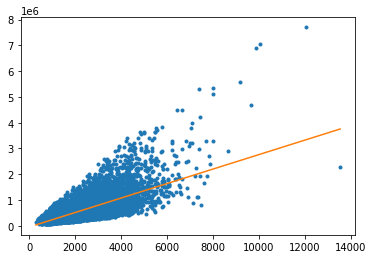

In [13]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
         poly1_data['power_1'], model1.predict(poly1_data),'-')

Let's unpack that plt.plot() command. The first pair of SArrays we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

In [14]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
my_features = poly2_data.column_names() # get the name of the features
poly2_data['price'] = sales['price'] # add price to the data since it's the target
model2 = turicreate.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)


Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.013202     | 5913021.143248     | 250948.367620                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [15]:
poly2_data

power_1,power_2,price
290,84100.0,142000.0
370,136900.0,276000.0
380,144400.0,245000.0
384,147456.0,265000.0
390,152100.0,228000.0
390,152100.0,245000.0
410,168100.0,325000.0
420,176400.0,229050.0
420,176400.0,280000.0
430,184900.0,80000.0


In [16]:
model2.coefficients

name,index,value,stderr
(intercept),None,199222.50159270596,7058.004803507263
power_1,None,67.99405839972361,5.287871989180537
power_2,None,0.03858123253668531,0.0008982465429586707


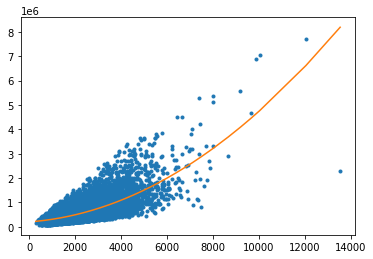

In [17]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
         poly2_data['power_1'], model2.predict(poly2_data),'-')

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

In [18]:
poly3_data = polynomial_sframe(sales['sqft_living'],3)
poly3_data['price'] = sales['price']
poly3_data

power_1,power_2,power_3,price
290,84100.0,24389000.0,142000.0
370,136900.0,50653000.0,276000.0
380,144400.0,54872000.0,245000.0
384,147456.0,56623104.0,265000.0
390,152100.0,59319000.0,228000.0
390,152100.0,59319000.0,245000.0
410,168100.0,68921000.0,325000.0
420,176400.0,74088000.0,229050.0
420,176400.0,74088000.0,280000.0
430,184900.0,79507000.0,80000.0


In [19]:
model3 = turicreate.linear_regression.create(poly3_data,target = 'price',features = ['power_1','power_2','power_3'],validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.016991     | 3261066.776472     | 249261.285049                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [20]:
model3.coefficients

name,index,value,stderr
(intercept),None,336788.12924828526,10661.015315839384
power_1,None,-90.14763634791908,10.622289129142523
power_2,None,0.08703671850443047,0.002966306216046972
power_3,None,-3.839852291217341e-06,2.241749084234439e-07


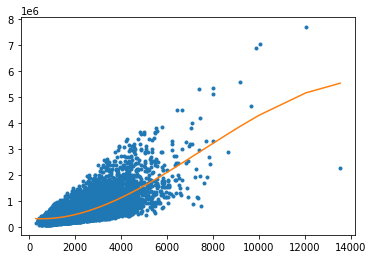

In [21]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
        poly3_data['power_1'],model3.predict(poly3_data),'-')

Now try a 15th degree polynomial:

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Then we will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (we should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit .

To split the sales data into four subsets, we perform the following steps:
* First split sales into 2 subsets with `.random_split(0.5, seed=0)`. 
* Next split the resulting subsets into 2 more subsets each. Use `.random_split(0.5, seed=0)`.

We set `seed=0` in these steps so that different users get consistent results.
You should end up with 4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. 

In [22]:
set_1,set_2 = sales.random_split(.5,seed=0)
set_3,set_4 = sales.random_split(.5,seed=0)

Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

In [23]:
def fit_degree_polynomial(set_,feature,degree,output):
    poly_data = polynomial_sframe(set_[feature],degree)
    my_features = poly_data.column_names()
    poly_data[output] = set_[output]
    model = turicreate.linear_regression.create(poly_data,target = output,features = my_features,validation_set = None)
    coefficients = model.coefficients
    plot = plt.plot(poly_data['power_1'],poly_data[output],'.',
                   poly_data['power_1'],model.predict(poly_data),'-')
    return (coefficients,
           plot)
   

Linear regression:

--------------------------------------------------------

Number of examples          : 10802

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.027760     | 2305941.533089     | 242353.285191                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

(Columns:
 	name	str
 	index	str
 	value	float
 	stderr	float
 
 Rows: 16
 
 Data:
 +-------------+-------+-------------------------+-----------------------+
 |     name    | index |          value          |         stderr        |
 +-------------+-------+-------------------------+-----------------------+
 | (intercept) |  None |    88124.84536087641    |   446040.18876601045  |
 |   power_1   |  None |    389.99081767649614   |   1755.8070173986691  |
 |   power_2   |  None |    -0.223774321145977   |   2.6668114027369776  |
 |   power_3   |  None |  7.601064673542696e-05  | 0.0017479867464305775 |
 |   power_4   |  None | -5.9528482339344105e-09 |          nan          |
 |   power_5   |  None |  -4.086292160040232e-13 |          nan          |
 |   power_6   |  None |  2.1119238117783476e-17 |          nan          |
 |   power_7   |  None |  3.201041758151158e-21  |          nan          |
 |   power_8   |  None |  1.5818157206820796e-25 |          nan          |
 |   power_9   | 

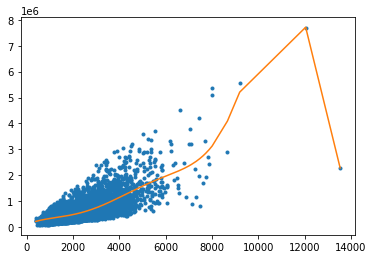

In [24]:
fit_degree_polynomial(set_1,'sqft_living',15,'price')
                                          

Linear regression:

--------------------------------------------------------

Number of examples          : 10811

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.019173     | 2418066.654490     | 248530.402056                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

(Columns:
 	name	str
 	index	str
 	value	float
 	stderr	float
 
 Rows: 16
 
 Data:
 +-------------+-------+-------------------------+--------------------+
 |     name    | index |          value          |       stderr       |
 +-------------+-------+-------------------------+--------------------+
 | (intercept) |  None |    89987.58433945704    |  672470.91736036   |
 |   power_1   |  None |    331.5108671619726    | 3088.2905762227597 |
 |   power_2   |  None |   -0.12409686985168619  | 5.141396105995418  |
 |   power_3   |  None |  1.9200709974693794e-05 |        nan         |
 |   power_4   |  None |   6.23073743574681e-09  |        nan         |
 |   power_5   |  None |  -7.855048667304419e-13 |        nan         |
 |   power_6   |  None | -1.0733547568093008e-16 |        nan         |
 |   power_7   |  None |  1.5425518024692439e-21 |        nan         |
 |   power_8   |  None |  1.2166215241326827e-24 |        nan         |
 |   power_9   |  None |  1.2073327479624774e-28 |   

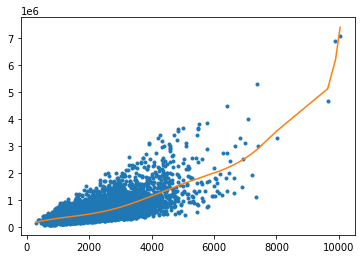

In [25]:
fit_degree_polynomial(set_2,'sqft_living',15,'price')

Linear regression:

--------------------------------------------------------

Number of examples          : 10802

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.020056     | 2305941.533089     | 242353.285191                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

(Columns:
 	name	str
 	index	str
 	value	float
 	stderr	float
 
 Rows: 16
 
 Data:
 +-------------+-------+-------------------------+-----------------------+
 |     name    | index |          value          |         stderr        |
 +-------------+-------+-------------------------+-----------------------+
 | (intercept) |  None |    88124.84536087641    |   446040.18876601045  |
 |   power_1   |  None |    389.99081767649614   |   1755.8070173986691  |
 |   power_2   |  None |    -0.223774321145977   |   2.6668114027369776  |
 |   power_3   |  None |  7.601064673542696e-05  | 0.0017479867464305775 |
 |   power_4   |  None | -5.9528482339344105e-09 |          nan          |
 |   power_5   |  None |  -4.086292160040232e-13 |          nan          |
 |   power_6   |  None |  2.1119238117783476e-17 |          nan          |
 |   power_7   |  None |  3.201041758151158e-21  |          nan          |
 |   power_8   |  None |  1.5818157206820796e-25 |          nan          |
 |   power_9   | 

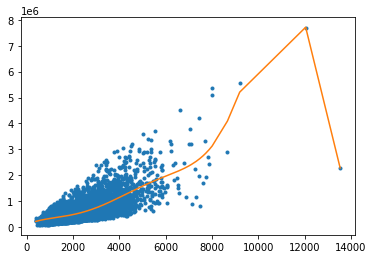

In [26]:
fit_degree_polynomial(set_3,'sqft_living',15,'price')

Linear regression:

--------------------------------------------------------

Number of examples          : 10811

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.020137     | 2418066.654490     | 248530.402056                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

(Columns:
 	name	str
 	index	str
 	value	float
 	stderr	float
 
 Rows: 16
 
 Data:
 +-------------+-------+-------------------------+--------------------+
 |     name    | index |          value          |       stderr       |
 +-------------+-------+-------------------------+--------------------+
 | (intercept) |  None |    89987.58433945704    |  672470.91736036   |
 |   power_1   |  None |    331.5108671619726    | 3088.2905762227597 |
 |   power_2   |  None |   -0.12409686985168619  | 5.141396105995418  |
 |   power_3   |  None |  1.9200709974693794e-05 |        nan         |
 |   power_4   |  None |   6.23073743574681e-09  |        nan         |
 |   power_5   |  None |  -7.855048667304419e-13 |        nan         |
 |   power_6   |  None | -1.0733547568093008e-16 |        nan         |
 |   power_7   |  None |  1.5425518024692439e-21 |        nan         |
 |   power_8   |  None |  1.2166215241326827e-24 |        nan         |
 |   power_9   |  None |  1.2073327479624774e-28 |   

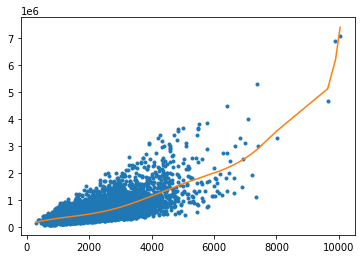

In [27]:
fit_degree_polynomial(set_4,'sqft_living',15,'price')

# Selecting a Polynomial Degree


We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`. Use `random_split(0.9, seed=1)`.
* Further split our training data into two sets: `training` and `validation`. Use `random_split(0.5, seed=1)`.

Again, we set `seed=1` to obtain consistent results for different users.

In [28]:
training_and_validation,testing = sales.random_split(.9,seed=1)
training_set,validation_set = training_and_validation.random_split(.5,seed=1)

Next we should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] 
    * Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
    *  my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for turicreate.linear_regression.create( features = my_features)
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and we will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data 


In [29]:
for degree in range(1,15+1):
            poly_data = polynomial_sframe(training_set['sqft_living'],degree)
            my_feature = poly_data.column_names()
            poly_data['price'] = training_set['price']
            test_poly_data = polynomial_sframe(validation_set['sqft_living'],degree)
            test_poly_data['price'] = validation_set['price']
            model = turicreate.linear_regression.create(poly_data,target = 'price',features = my_feature,validation_set = None,verbose = False )
            test_predictions = model.predict(test_poly_data)
            errors = test_predictions - test_poly_data['price']
            RSS = (pow(errors,2)).sum()
            name = 'RSS_' + str(degree)   
            print (name,RSS)
            

RSS_1 676709767608078.4
RSS_2 607090520315221.1
RSS_3 616714569189867.9
RSS_4 609129223867894.6
RSS_5 599177133711134.2
RSS_6 589182472887052.5
RSS_7 591717032762576.0
RSS_8 601558232220902.0
RSS_9 612563849869616.6
RSS_10 621744287759493.8
RSS_11 627012015603680.0
RSS_12 627757922125701.5
RSS_13 624738514702923.8
RSS_14 619369720470387.9
RSS_15 613089218902145.8


**Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

Now that we have chosen the degree of our polynomial using validation data, compute the RSS of this model on TEST data. 

In [30]:
lowest_rss = []
for degree in range(1,15+1):
            poly_data = polynomial_sframe(testing['sqft_living'],degree)
            my_feature = poly_data.column_names()
            poly_data['price'] = testing['price']
            test_poly_data = polynomial_sframe(validation_set['sqft_living'],degree)
            test_poly_data['price'] = validation_set['price']
            model = turicreate.linear_regression.create(poly_data,target = 'price',features = my_feature,validation_set = None,verbose = False )
            test_predictions = model.predict(test_poly_data)
            errors = test_predictions - test_poly_data['price']
            RSS = (pow(errors,2)).sum()
            name = 'RSS_' + str(degree)
            lowest_rss.append(RSS)
            print (name,RSS)
            

RSS_1 680940812562420.8
RSS_2 610417612795476.9
RSS_3 907892003875072.1
RSS_4 4601260371792998.0
RSS_5 5486604382530504.0
RSS_6 892150532392551.6
RSS_7 1.3743014209777126e+16
RSS_8 4.099734893586245e+16
RSS_9 1.0335872889852792e+16
RSS_10 1.5543340163396384e+17
RSS_11 2.081669516243183e+18
RSS_12 9.889543284241162e+18
RSS_13 3.0277386016827433e+19
RSS_14 7.289408858402831e+19
RSS_15 1.6259258436695304e+20


**what is the RSS on TEST data for the model with the degree selected from Validation data?**

In [67]:
x = turicreate.SArray(lowest_rss)
data = turicreate.SFrame({'RSS' : x})
data

RSS
610417612795476.9
680940812562420.8
892150532392551.6
907892003875072.1
4601260371792998.0
5486604382530504.0
1.0335872889852792e+16
1.3743014209777126e+16
4.099734893586245e+16
1.5543340163396384e+17


In [59]:
data.sort('RSS')

RSS
610417612795476.9
680940812562420.8
892150532392551.6
907892003875072.1
4601260371792998.0
5486604382530504.0
1.0335872889852792e+16
1.3743014209777126e+16
4.099734893586245e+16
1.5543340163396384e+17


In [66]:
min(data['RSS'])

610417612795476.9

In [64]:
max(data['RSS'])

1.6259258436695304e+20